In [3]:
import numpy as np                                                                                                                                                                                  
import xarray as xr                                                                                                                                                                                 
import os                                                                                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                     
import matplotlib.cm as cm    
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                  
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
import myfuncts 
from myfuncts2  import *
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter1d
                                                                                                                                                                                                    
  

### Simplified [diff res]

ssh8c_4cnv
swotssh_8c_4cnv
avisossh_8c_4cnv
avisosshsst_8c_4cnv
swotsshsst_8c_4cnv


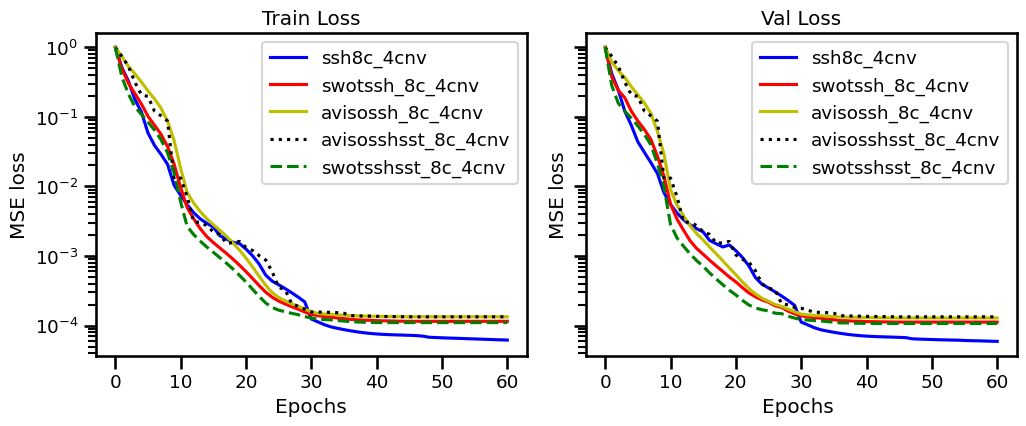

In [2]:

sims=myfuncts.load_tst_noiseS()


colors=['b', 'r', 'y', 'k:', 'g--']
plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 1#.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
i=0
for sim in sims:
        ax1.plot((sim.tloss/norm), colors[i],label=sim.name)
        ax2.plot((sim.vloss/norm),colors[i],label=sim.name)
        i=i+1

ax1.title.set_text('Train Loss')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')

ax2.legend()



plt.tight_layout()
plt.show()


### Unet [diff res]

swotssh_Unet
avisossh_Unet
ssh_Unet


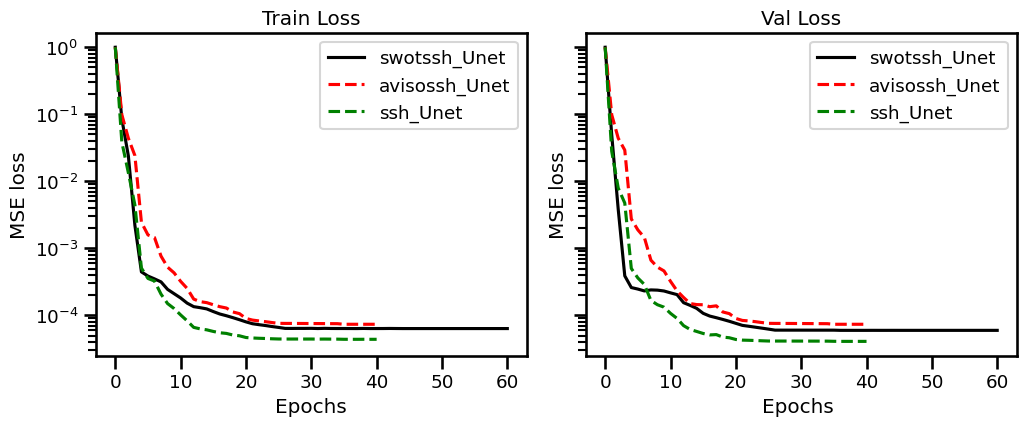

In [3]:

sims=myfuncts.load_tst_noiseU()


colors=['k', 'r--', 'g--', 'b--']
plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 1#.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
i=0
for sim in sims:
        ax1.plot((sim.tloss/norm), colors[i],label=sim.name)
        ax2.plot((sim.vloss/norm),colors[i],label=sim.name)
        i=i+1

ax1.title.set_text('Train Loss')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')

ax2.legend()



plt.tight_layout()
plt.show()


### quantile 90th


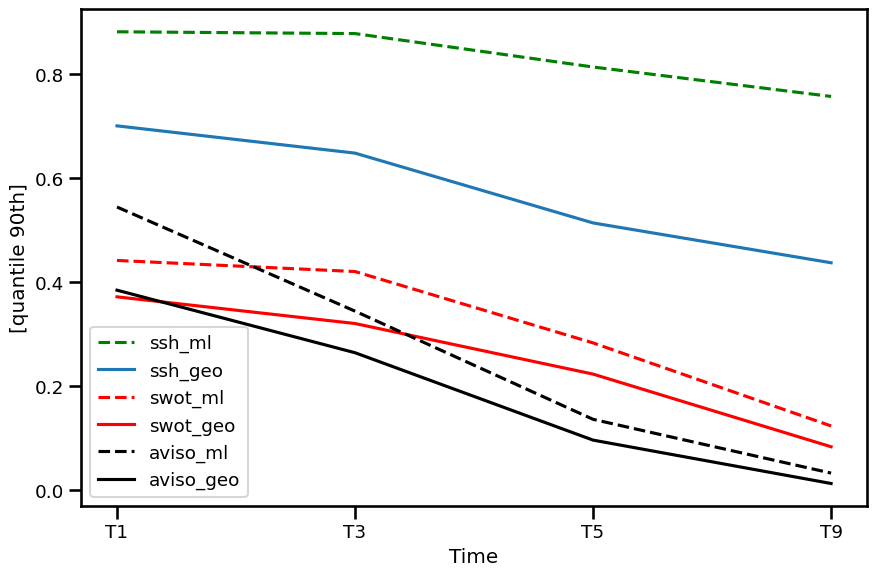

In [4]:
ssh, swot, aviso, geo=myfuncts.load_ssh_geos()
ssh, swot1, aviso1 =myfuncts.load_sshs()


plt.rcParams["figure.figsize"] = [9, 6]
f, (ax1) = plt.subplots(1, 1, sharey=True)

ax1.plot(ssh, 'g--', label='ssh_ml')
ax1.plot(geo,label='ssh_geo')

ax1.plot(swot1, 'r--' ,label='swot_ml')
ax1.plot(swot, 'r', label='swot_geo')


ax1.plot(aviso1,'k--' ,label='aviso_ml')
ax1.plot(aviso,'k', label='aviso_geo')



ax1.set_ylabel('[quantile 90th]')
ax1.set_xlabel('Time')
ax1.legend()
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(['T1','T3','T5','T9'])


plt.tight_layout()
plt.show()


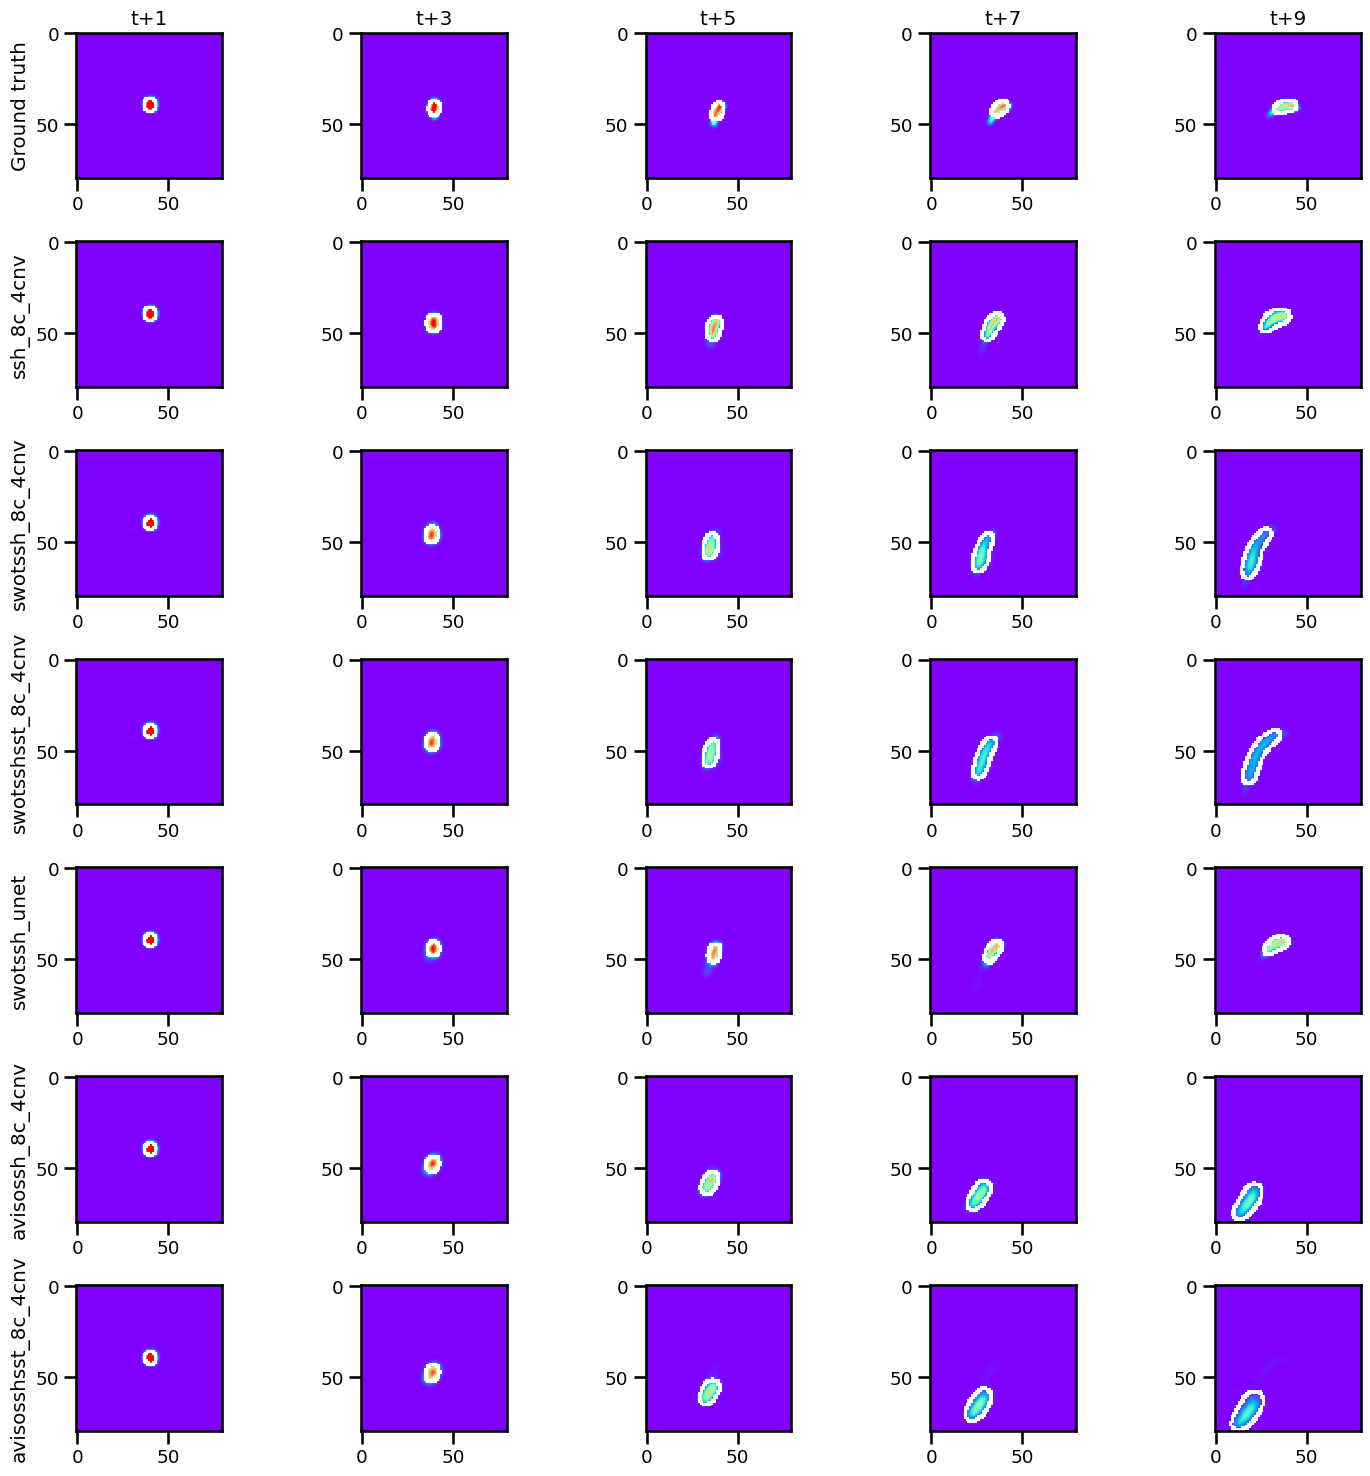

In [29]:
from skimage import feature

def get_ctr(ml,pr):
    ml[ml==0]=np.nan
    tr=np.nanquantile(ml, pr, axis=None)
    #print(tr)
    ml[ml>=tr]=1
    ml[ml<tr]=0
    ml[np.isnan(ml)] = 0
    ml = feature.canny(ml, sigma=3)
    ml=ml.astype(float)
    ml[ml==1] = np.nan

    return ml

gt, ssh_8c2, unet, swotssh_8c2, avisossh_8c2, swotsshsst_8c2,  avisosshsst_8c2 =myfuncts.load_tst_noiseb2(9)
tgt, tssh_8c2, tunet, tswotssh_8c2, tavisossh_8c2, tswotsshsst_8c2m, tavisosshsst_8c2  =myfuncts.load_tst_noiseb2(9)

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=7, figsize=(15,15))
axs.shape

vm=0.85
k=40

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(swotssh_8c2[i], axis=None), ssh_8c2[i].shape)
    ind3 = np.unravel_index(np.argmax(ssh_8c2[i], axis=None), ssh_8c2[i].shape)
    ind4 = np.unravel_index(np.argmax(unet[i], axis=None), ssh_8c2[i].shape)
    ind5 = np.unravel_index(np.argmax(avisossh_8c2[i], axis=None), avisossh_8c2[i].shape)
    ind6 = np.unravel_index(np.argmax(swotssh_8c2[i], axis=None), ssh_8c2[i].shape)
    ind6=ind1;ind5=ind1;ind4=ind1;ind3=ind1;ind2=ind1
    pr=0.9
    gt[i]=gt[i]+get_ctr(tgt[i],pr)
    ssh_8c2[i]=ssh_8c2[i]+get_ctr(tssh_8c2[i],pr)
    swotssh_8c2[i]=swotssh_8c2[i]+get_ctr(tswotssh_8c2[i],pr)
    swotsshsst_8c2[i]=swotsshsst_8c2[i]+get_ctr(tswotsshsst_8c2[i],pr)
    avisossh_8c2[i]=avisossh_8c2[i]+get_ctr(tavisossh_8c2[i],pr)
    avisosshsst_8c2[i]=avisosshsst_8c2[i]+get_ctr(tavisosshsst_8c2[i],pr)
    unet[i]=unet[i]+get_ctr(tunet[i],pr)

    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ssh_8c2[i,ind3[0]-k:ind3[0]+k,ind3[1]-k:ind3[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(swotssh_8c2[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[3,j].imshow(swotsshsst_8c2[i,ind6[0]-k:ind6[0]+k,ind6[1]-k:ind6[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[4,j].imshow(unet[i,ind4[0]-k:ind4[0]+k,ind4[1]-k:ind4[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[5,j].imshow(avisossh_8c2[i,ind5[0]-k:ind5[0]+k,ind5[1]-k:ind5[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[6,j].imshow(avisosshsst_8c2[i,ind5[0]-k:ind5[0]+k,ind5[1]-k:ind5[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)

    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ssh_8c_4cnv')
axs[2,0].set_ylabel('swotssh_8c_4cnv')
axs[3,0].set_ylabel('swotsshsst_8c_4cnv')
axs[4,0].set_ylabel('swotssh_unet')
axs[5,0].set_ylabel('avisossh_8c_4cnv')
axs[6,0].set_ylabel('avisosshsst_8c_4cnv')


plt.tight_layout()
plt.show()


### Table of diff exp [MSE]

|  |  ssh | ssh+sst  | aviso  | aviso+sst  | swot| swot+sst|
|---|---|---|---|---|---|---|
| simplified  |  8.38 |  7.81 | 13.42  | 12.31  | 11.21  | 10.56  |
| Unet  |5.25   |  x  | 9.24  | 8.91  | 8.34  |  7.79 |
|   |   |   |   |   |   |   |